In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
total_data = pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [24]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      320504 non-null  object 
 1   time_occ      320504 non-null  int64  
 2   area_name     320504 non-null  int64  
 3   crm_cd_desc   320504 non-null  int64  
 4   vict_age      320504 non-null  int64  
 5   vict_sex      320504 non-null  int64  
 6   vict_descent  320504 non-null  int64  
 7   premis_desc   320504 non-null  int64  
 8   weapon_desc   320504 non-null  int64  
 9   status_desc   320504 non-null  int64  
 10  location      320504 non-null  int64  
 11  lat           320504 non-null  float64
 12  lon           320504 non-null  float64
 13  weekday       320504 non-null  int64  
 14  month         320504 non-null  int64  
 15  mocodes_desc  320504 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 39.1+ MB


In [25]:
prueba = total_data[total_data["crm_cd_desc"].isin([10, 26, 38, 66, 83, 118])]
prueba.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
15,2020-01-15,700,1,10,62,1,4,2,1,0,14,34.0428,-118.2461,0,0,14
16,2020-01-19,2000,1,10,71,1,2,11,1,2,15,34.0578,-118.2371,3,0,15
21,2020-01-30,2040,1,10,52,1,1,13,6,2,20,34.0456,-118.2540,1,0,20
22,2020-02-04,920,1,10,38,0,1,14,7,2,21,34.0467,-118.2470,4,1,21
35,2020-01-01,1200,1,10,57,1,0,1,1,1,12,34.0401,-118.2459,0,0,32


In [26]:
prueba['date_occ'] = pd.to_datetime(prueba['date_occ'], errors='coerce')
prueba['date_occ'] = prueba['date_occ'].astype('int64')

C:\Users\luisf\AppData\Local\Temp\ipykernel_1724\1221384726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['date_occ'] = pd.to_datetime(prueba['date_occ'], errors='coerce')
C:\Users\luisf\AppData\Local\Temp\ipykernel_1724\1221384726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['date_occ'] = prueba['date_occ'].astype('int64')


In [27]:
prueba.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
15,1579046400000000000,700,1,10,62,1,4,2,1,0,14,34.0428,-118.2461,0,0,14
16,1579392000000000000,2000,1,10,71,1,2,11,1,2,15,34.0578,-118.2371,3,0,15
21,1580342400000000000,2040,1,10,52,1,1,13,6,2,20,34.0456,-118.2540,1,0,20
22,1580774400000000000,920,1,10,38,0,1,14,7,2,21,34.0467,-118.2470,4,1,21
35,1577836800000000000,1200,1,10,57,1,0,1,1,1,12,34.0401,-118.2459,0,0,32


In [33]:
prueba.columns

Index(['date_occ', 'time_occ', 'area_name', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_desc', 'weapon_desc', 'status_desc',
       'location', 'lat', 'lon', 'weekday', 'month', 'mocodes_desc'],
      dtype='object')

In [34]:
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

scaler = MinMaxScaler()
scaler.fit(prueba)

scal_features = scaler.transform(prueba)

prueba_scal = pd.DataFrame(scal_features, index = prueba.index, columns = prueba.columns)

prueba_scal.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
15,0.009589,0.296438,0.05,0.0,0.618557,0.5,0.235294,0.006689,0.013514,0.00,0.000311,0.541707,0.828428,0.000000,0.000000,0.000135
16,0.012329,0.847752,0.05,0.0,0.711340,0.5,0.117647,0.036789,0.013514,0.50,0.000333,0.565862,0.846446,0.500000,0.000000,0.000144
21,0.019863,0.864716,0.05,0.0,0.515464,0.5,0.058824,0.043478,0.081081,0.50,0.000445,0.546216,0.812613,0.166667,0.000000,0.000193
22,0.023288,0.389737,0.05,0.0,0.371134,0.0,0.058824,0.046823,0.094595,0.50,0.000467,0.547987,0.826627,0.666667,0.090909,0.000202
35,0.000000,0.508482,0.05,0.0,0.567010,0.5,0.000000,0.003344,0.013514,0.25,0.000267,0.537359,0.828829,0.000000,0.000000,0.000308


c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1469) found smaller than n_clusters (2000). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


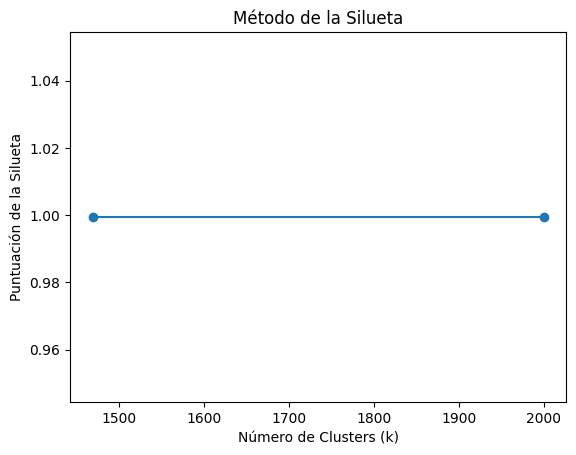

Número óptimo de clusters (k) según el método de la silueta: 1469


In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples
# Probar diferentes valores de k
k_values = [1469, 2000]
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(prueba)
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(prueba, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()
# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

In [37]:
silhouette_scores

[0.9995035637034148, 0.9995035637034148]

c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


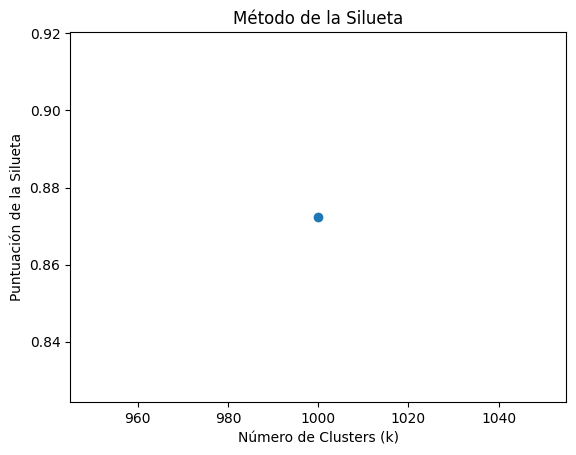

Número óptimo de clusters (k) según el método de la silueta: 1000


In [38]:
from sklearn.metrics import silhouette_score, silhouette_samples
# Probar diferentes valores de k
k_values = [1000]
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(prueba)
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(prueba, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()
# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

In [39]:
silhouette_scores

[0.8723613390692992]